<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [13]:
#Carga desde un archivo .xlsx sin indice
Mexico= pd.read_csv("Mexico.csv", encoding="latin1")

In [14]:
#Verificamos información del DataFrame
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26401 non-null  object 
 1   source                                        26401 non-null  object 
 2   name                                          26401 non-null  object 
 3   description                                   25633 non-null  object 
 4   neighborhood_overview                         13970 non-null  object 
 5   host_id                                       26401 non-null  int64  
 6   host_name                                     25544 non-null  object 
 7   host_since                                    25487 non-null  object 
 8   host_location                                 20164 non-null  object 
 9   host_about                                    15164 non-null 

**Determinación de Clases para datos agrupados**


In [10]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [15]:
#Corroboramos valores nulos
valores_nulos=Mexico.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       768
neighborhood_overview                           12431
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                                3373
Length: 71, dtype: int64

In [16]:
#Calculamos el numero total de la población "n"
Mexico['number_of_reviews']. info()
n=26401

<class 'pandas.core.series.Series'>
RangeIndex: 26401 entries, 0 to 26400
Series name: number_of_reviews
Non-Null Count  Dtype
--------------  -----
26401 non-null  int64
dtypes: int64(1)
memory usage: 206.4 KB


In [17]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Mexico['number_of_reviews'].max()
Min=Mexico['number_of_reviews'].min()
Limites= [Min, Max]
Limites

[0, 1342]

In [18]:
#Calculamos el rango R
R=Max-Min
R

1342

In [19]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [20]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

85.5879374445979

**Creación de Categorias a partir de clases**

In [21]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(-0.1, 100.1, 16)
intervalos

array([-1.000e-01,  6.580e+00,  1.326e+01,  1.994e+01,  2.662e+01,
        3.330e+01,  3.998e+01,  4.666e+01,  5.334e+01,  6.002e+01,
        6.670e+01,  7.338e+01,  8.006e+01,  8.674e+01,  9.342e+01,
        1.001e+02])

In [31]:
#Creamos las categorías 
categorias= ["Categoría1 (0-6.5 number_of_reviews)", "Categoría2 (6.6-1.32 number_of_reviews)","Categoría3 (1.33-1.99 number_of_reviews)", "Categoría4 (2-2.66 number_of_reviews)",
             "Categoría5 (2.67-3.3 number_of_reviews)", "Categoría6 (3.4-3.99 number_of_reviews)","Categoría7 (4-4.66 number_of_reviews)", "Categoría8 (4.67-5.3 number_of_reviews)", "Categoría9 (5.4-6 number_of_reviews)", "Categoría10 (6.1-6.6 number_of_reviews)","Categoría11 (6.7-7.3 number_of_reviews)", "Categoría12 (7.4-8 number_of_reviews)",
             "Categoría13 (8.1-8.6 number_of_reviews)", "Categoría14 (8.7-9.3 number_of_reviews)", "Categoría15 (9.4-1 number_of_reviews)"
             ]

In [32]:
#Finalmente creamos las categorías en la columna numérica
Mexico['number_of_reviews']=pd.cut(x= Mexico['number_of_reviews'], bins=intervalos, labels= categorias)
Mexico['number_of_reviews']

0           Categoría1 (0-6.5 number_of_reviews)
1        Categoría10 (6.1-6.6 number_of_reviews)
2        Categoría13 (8.1-8.6 number_of_reviews)
3        Categoría8 (4.67-5.3 number_of_reviews)
4                                            NaN
                          ...                   
26396       Categoría1 (0-6.5 number_of_reviews)
26397       Categoría1 (0-6.5 number_of_reviews)
26398       Categoría1 (0-6.5 number_of_reviews)
26399       Categoría1 (0-6.5 number_of_reviews)
26400       Categoría1 (0-6.5 number_of_reviews)
Name: number_of_reviews, Length: 26401, dtype: category
Categories (15, object): ['Categoría1 (0-6.5 number_of_reviews)' < 'Categoría2 (6.6-1.32 number_of_reviews)' < 'Categoría3 (1.33-1.99 number_of_reviews)' < 'Categoría4 (2-2.66 number_of_reviews)' ... 'Categoría12 (7.4-8 number_of_reviews)' < 'Categoría13 (8.1-8.6 number_of_reviews)' < 'Categoría14 (8.7-9.3 number_of_reviews)' < 'Categoría15 (9.4-1 number_of_reviews)']

In [26]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Mexico['number_of_reviews'].value_counts().reset_index()
Tabla_freq

number_of_reviews  count
0                    0   3373
1                    1   1395
2                    2   1033
3                    3    790
4                    4    708
..                 ...    ...
556                480      1
557                679      1
558                447      1
559                641      1
560                649      1

[561 rows x 2 columns]

In [27]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

number_of_reviews  count
0                    0   3373
1                    1   1395
2                    2   1033
3                    3    790
4                    4    708
..                 ...    ...
556                480      1
557                679      1
558                447      1
559                641      1
560                649      1

[561 rows x 2 columns]

In [28]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('number_of_reviews')
Filtro_index

count
number_of_reviews       
0                   3373
1                   1395
2                   1033
3                    790
4                    708
...                  ...
480                    1
679                    1
447                    1
641                    1
649                    1

[561 rows x 1 columns]

Text(0, 0.5, 'Frecuencia')

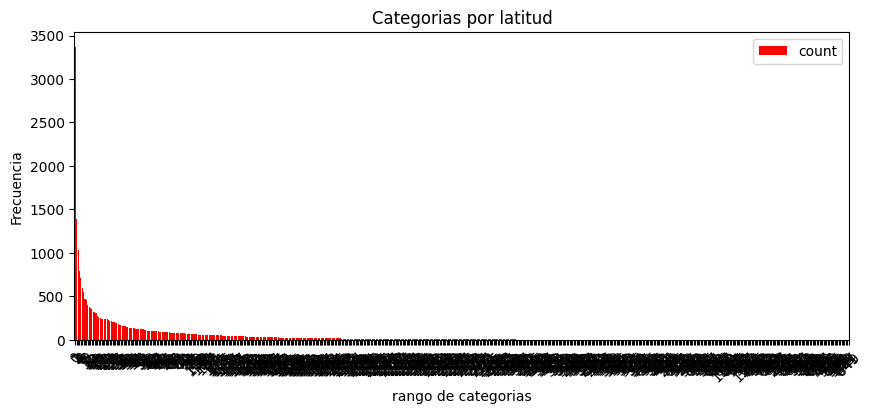

In [29]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')